In [4]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()




train = pd.read_csv('train.csv')
# train['Sex'] = train['Sex'].astype('category')
train['Sex'] = enc.fit_transform(train['Sex'])
train['z'] = np.log1p(train['Calories'])
test = pd.read_csv('test.csv')
# test['Sex'] = test['Sex'].astype('category')
test['Sex'] = enc.transform(test['Sex'])
X_train = train.drop(columns=['id', 'Calories', 'z'])
y_train = train['z']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test = test.drop(columns=['id'])

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, enable_categorical=True)

results = {}
model = xgb.train({'tree_method': 'hist', 'seed': 1994,
                  'objective': 'reg:squarederror', 'eval_metric': 'rmse'},
          dtrain=dtrain,
          num_boost_round=1000,
          evals=[(dtrain, 'dtrain'), (dval, 'dval')],
          evals_result=results,
          verbose_eval=True,)

[0]	dtrain-rmse:0.68136	dval-rmse:0.68073
[1]	dtrain-rmse:0.48459	dval-rmse:0.48413
[2]	dtrain-rmse:0.34785	dval-rmse:0.34751
[3]	dtrain-rmse:0.25348	dval-rmse:0.25334
[4]	dtrain-rmse:0.18885	dval-rmse:0.18876
[5]	dtrain-rmse:0.14486	dval-rmse:0.14486
[6]	dtrain-rmse:0.11566	dval-rmse:0.11581
[7]	dtrain-rmse:0.09739	dval-rmse:0.09765
[8]	dtrain-rmse:0.08567	dval-rmse:0.08604
[9]	dtrain-rmse:0.07843	dval-rmse:0.07888
[10]	dtrain-rmse:0.07373	dval-rmse:0.07424
[11]	dtrain-rmse:0.07090	dval-rmse:0.07154
[12]	dtrain-rmse:0.06896	dval-rmse:0.06974
[13]	dtrain-rmse:0.06774	dval-rmse:0.06876
[14]	dtrain-rmse:0.06691	dval-rmse:0.06806
[15]	dtrain-rmse:0.06617	dval-rmse:0.06742
[16]	dtrain-rmse:0.06579	dval-rmse:0.06714
[17]	dtrain-rmse:0.06536	dval-rmse:0.06684
[18]	dtrain-rmse:0.06510	dval-rmse:0.06663
[19]	dtrain-rmse:0.06483	dval-rmse:0.06641
[20]	dtrain-rmse:0.06458	dval-rmse:0.06619
[21]	dtrain-rmse:0.06443	dval-rmse:0.06610
[22]	dtrain-rmse:0.06414	dval-rmse:0.06586
[23]	dtrain-rmse:0.06

In [1]:
import shap
explainer = shap.Explainer(model)
interaction_values = explainer(X_val)
shap.summary_plot(interaction_values, X_val, plot_type="bar", max_display=10)

ModuleNotFoundError: No module named 'shap'

# Feature Engineering

In [5]:
train = pd.read_csv('train.csv')
# train['Sex'] = train['Sex'].astype('category')
train['Sex'] = enc.fit_transform(train['Sex'])
train['z'] = np.log1p(train['Calories'])
train['Duration*HR'] = train['Duration'] * train['Heart_Rate']
test = pd.read_csv('test.csv')
# test['Sex'] = test['Sex'].astype('category')
test['Sex'] = enc.transform(test['Sex'])
test['Duration*HR'] = test['Duration'] * test['Heart_Rate']


X_train = train.drop(columns=['id', 'Calories', 'z'])
y_train = train['z']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test = test.drop(columns=['id'])

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, enable_categorical=True)

results = {}
model = xgb.train({'tree_method': 'hist', 'seed': 1994,
                  'objective': 'reg:squarederror', 'eval_metric': 'rmse'},
          dtrain=dtrain,
          num_boost_round=1000,
          evals=[(dtrain, 'dtrain'), (dval, 'dval')],
          evals_result=results,
          verbose_eval=True,)

[0]	dtrain-rmse:0.67992	dval-rmse:0.67939
[1]	dtrain-rmse:0.48217	dval-rmse:0.48192
[2]	dtrain-rmse:0.34489	dval-rmse:0.34467
[3]	dtrain-rmse:0.24998	dval-rmse:0.24980
[4]	dtrain-rmse:0.18498	dval-rmse:0.18481
[5]	dtrain-rmse:0.14157	dval-rmse:0.14146
[6]	dtrain-rmse:0.11303	dval-rmse:0.11294
[7]	dtrain-rmse:0.09475	dval-rmse:0.09492
[8]	dtrain-rmse:0.08317	dval-rmse:0.08339
[9]	dtrain-rmse:0.07596	dval-rmse:0.07629
[10]	dtrain-rmse:0.07177	dval-rmse:0.07222
[11]	dtrain-rmse:0.06905	dval-rmse:0.06963
[12]	dtrain-rmse:0.06737	dval-rmse:0.06798
[13]	dtrain-rmse:0.06627	dval-rmse:0.06693
[14]	dtrain-rmse:0.06551	dval-rmse:0.06630
[15]	dtrain-rmse:0.06498	dval-rmse:0.06584
[16]	dtrain-rmse:0.06435	dval-rmse:0.06532
[17]	dtrain-rmse:0.06396	dval-rmse:0.06502
[18]	dtrain-rmse:0.06370	dval-rmse:0.06485
[19]	dtrain-rmse:0.06354	dval-rmse:0.06481
[20]	dtrain-rmse:0.06335	dval-rmse:0.06466
[21]	dtrain-rmse:0.06311	dval-rmse:0.06446
[22]	dtrain-rmse:0.06302	dval-rmse:0.06440
[23]	dtrain-rmse:0.06

A 0.002 improvement from the interaction feature

# FE 1

Include a feature that encodes how much HR deviates from linear fit wrt 

# Additional Visuals for FE

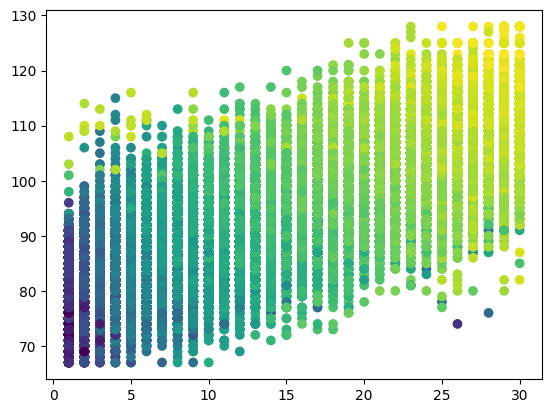

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train['Duration'], train['Heart_Rate'], c=train['z'], cmap='viridis')

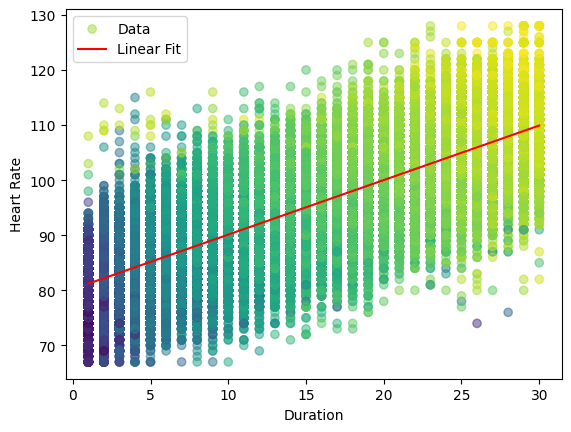

In [7]:
# Fit a simple linear model
coefficients = np.polyfit(train['Duration'], train['Heart_Rate'], 1)  # Linear fit (degree=1)
linear_model = np.poly1d(coefficients)

# Generate predictions
x_vals = np.linspace(train['Duration'].min(), train['Duration'].max(), 100)
y_vals = linear_model(x_vals)

# Visualize the scatter plot and the predicted line
plt.scatter(train['Duration'], train['Heart_Rate'], c=train['z'], cmap='viridis', alpha=0.5, label='Data')
plt.plot(x_vals, y_vals, color='red', label='Linear Fit')
plt.xlabel('Duration')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()